In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file
file_path = r"E:\DATA SCIENCE\CHURN ANALYSIS\Data & Resources\prediction\prediction_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_churndata'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  customer_id  gender  age married           state  number_of_referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0  Bank Withdrawal          95.10       6683.40          0.00   
1  Bank Wi

In [4]:

columns_to_drop = ['customer_id', 'churn_category', 'churn_reason']

# Drop columns that exist in the dataset
data = data.drop([col for col in columns_to_drop if col in data.columns], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines',
    'internet_service', 'internet_type', 'online_security', 'online_backup',
    'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
    'payment_method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    if column in data.columns:  # Ensure the column exists in the dataset
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Manually encode the target variable 'customer_status'
if 'customer_status' in data.columns:
    data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('customer_status', axis=1, errors='ignore')
y = data['customer_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed successfully!")


Data preprocessing completed successfully!


In [6]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[775  72]
 [130 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       847
           1       0.76      0.63      0.69       355

    accuracy                           0.83      1202
   macro avg       0.81      0.77      0.79      1202
weighted avg       0.83      0.83      0.83      1202



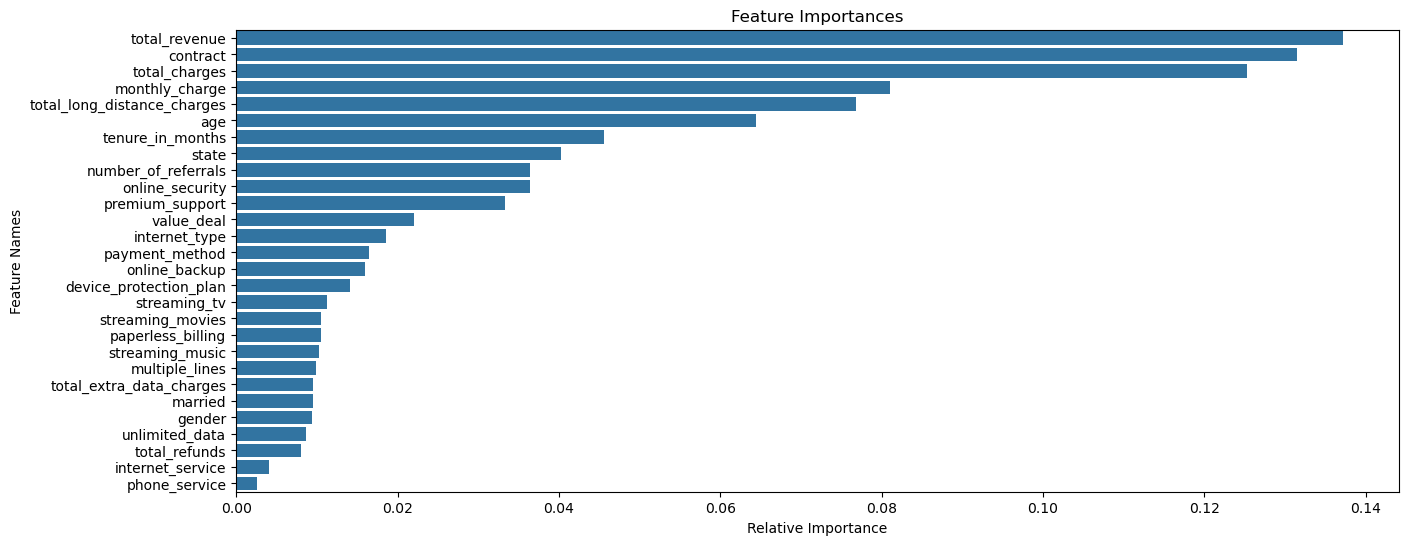

In [8]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [61]:
# Define the path to the Joiner Data Excel file
file_path = r"E:\DATA SCIENCE\CHURN ANALYSIS\Data & Resources\prediction\prediction_data.xlsx"
sheet_name = 'vw_joindata'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['customer_id']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

# Handle missing values in categorical columns
categorical_columns = new_data.select_dtypes(include=['object']).columns
new_data[categorical_columns] = new_data[categorical_columns].fillna('Unknown')

# Ensure 'Unknown' is part of the LabelEncoder's classes_
for column in categorical_columns:
    if column in label_encoders:
        encoder = label_encoders[column]
        # If 'Unknown' is not in classes, add it
        if 'Unknown' not in encoder.classes_:
            encoder.classes_ = np.append(encoder.classes_, 'Unknown')
        # Transform the column
        new_data[column] = encoder.transform(new_data[column])
    else:
        print(f"Label encoder for column '{column}' not found. Ensure all encoders are saved.")

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
output_path = r"E:\DATA SCIENCE\CHURN ANALYSIS\Data & Resources\prediction\Predictions.csv"
original_data.to_csv(output_path, index=False)




  customer_id  gender  age married        state  number_of_referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                 7     Deal 5            No            NaN  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0     Mailed Check          24.30         38.45           0.0   
1  Bank Withdrawal          